<img src="../slike/linreg_1.jpg" width=600/>

# Supervised learning

The scenario for *controlled modeling* methods is often the following. The data is presented with couples

$$ {(\vec{x}_1, y_1), (\vec{x}_2, y_2), ... (\vec{x}_n, y_n)} $$

where $\vec{x}_i$ is called *independent*, and $y_i$ *dependent* variables. We are interested in the *mapping* $h(\vec{x})$, which maps the values of the independent variable to the dependent, with the error $\epsilon_i$. So,

$$ y_i = h(\vec{x_i}) + \epsilon_i $$

The variables $\vec{x}_i$, $y$ can generally be continuous, discrete and others. The $h(\vec{x})$ mapping represents the *model* of the data. The mapping can be any arbitrary mathematical function (or also an algorithm, a program) that depends on one or more *parameters*.

Machine learning is often regarded as a search for parameters (or of the function itself) so that the error $\epsilon_i$ is as small as possible.

<br/>
<br/>
<br/>

<img src="../slike/linreg_2.png" width=600/>

## Linear regression

Linear regression is an example of a simple model where we assume:
* both dependent as independent variables are real numbers
* the dependent variable is a linear combination of independent ones
* The $\epsilon$ error is normally distributed with the hope of $\mu_{\epsilon}=0$ and unknown variance

The dependent variables are in general vectors in the $p$-dimensional space of real numbers, $\vec{x} = (x_1, x_2, ... x_p)$.

**The model** is of form

$$ h(\vec{x}) = \beta_1 x_1 + \beta_2 x_2 + ... + \beta_p x_p + \beta_0$$

where the vector $\vec{\beta} = (\beta_0, \beta_1, ... \beta_p)$ represents unknown parameters or coefficients. The model is therefore a line (for $p=1$) or a plane in $p$-dimensional space.

Learning is the search (optimization) of parameters $\vec{\beta}$ with the aim of reducing the average error in the data.

$$ \text{min}_{\beta} \frac{1}{n} \sum_1^{n} (y_i - h(\vec{x}_i))^2 = \frac{1}{n} \sum_1^{n} \epsilon^2 $$

The value of the above term is called **the mean square error** (or MSE). From a statistical point of view it represents the **unexplained variance**.

At this time, we will not derive algorithms for minimizing the above expression, but rather focus on practical use. More information is available <a href="http://www.stat.cmu.edu/~hseltman/309/Book/chapter9.pdf">here</a>.

In [ ]:
%matplotlib inline
%config InlineBackend.figure_formats = ['jpg']
import matplotlib
matplotlib.figure.Figure.__repr__ = lambda self: (
    f"<{self.__class__.__name__} size {self.bbox.size[0]:g}"
    f"x{self.bbox.size[1]:g} with {len(self.axes)} Axes>")

import matplotlib.pyplot as plt
plt.style.use('../PR.mplstyle')

import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error

Let's start with a simple example with one independent variable $x$ and a dependent variable $y$.

(101, 1)
(101, 1)


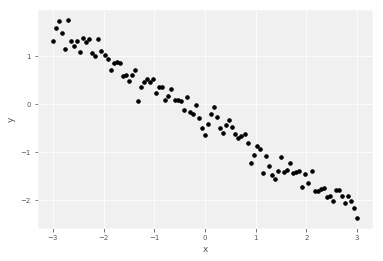

In [ ]:
data = np.loadtxt("../data/sintetični/data_A.txt")
x    = data[:, [0]]
y    = -data[:, [1]]

print(x.shape)
print(y.shape)

plt.figure()
plt.plot(x, y, "k.")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

The data strongly resembles a line.

Let's try to find a linear model that will reduce the mean square error.

In the left image, we display the <font color="green"> values of a model</font> for all values $x$ on a given interval.

The right picture shows the value of *remainders* $y_i - h(\vec{x}_i)$. The better the model fits the data, the less connected the dependent variable and the remainder will be.

In [3]:
from scipy.stats import pearsonr
def plot_fit_residual(x, y, yp):

    # Model
    fig, axes  = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
    axes[0].plot(x.ravel(), y.ravel(), "k.",  label="Podatki")
    axes[0].plot(x.ravel(), yp.ravel(), "g-", label="Model h(x)")
    axes[0].set_xlabel("x")
    axes[0].set_ylabel("y")
    axes[0].legend(loc=4)

    # Ostanki
    r = pearsonr(y.ravel(), y.ravel()-yp.ravel())[0]
    axes[1].plot(y.ravel(), y.ravel()-yp.ravel(), "k.", label="Ostanek")
    axes[1].set_xlabel("y")
    axes[1].set_ylabel("y-h(x)")
    axes[1].set_title("Graf ostankov, R=%.3f" % r)
    axes[1].legend(loc=4)
    plt.show()

[-0.31065728] [[-0.6374012]]


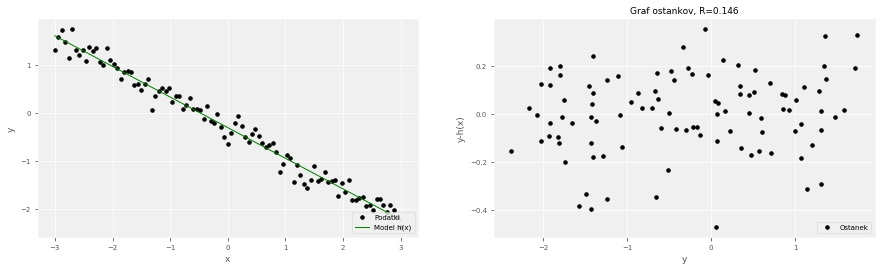

In [4]:
# Ucenje modela
model = LinearRegression()
model.fit(x, y)

print(model.intercept_,model.coef_)


# Napoved vrednosti za podatke
hx = model.predict(x)

plot_fit_residual(x, y, hx)

Let's measure the mean square error ...

In [5]:
mean_squared_error(hx, y)

0.027007427173743746

... which is equal to variance of difference.

In [6]:
np.var(hx-y)

0.027007427173743749

So we can get the *proportion of the explained variance*. The proportion in percent is easier to interpret intuitively.

In [7]:
explained_var = 100.0 * ( np.var(y) - np.var(hx-y) ) /  np.var(y)
print("Explained variance: %.2f " % explained_var + "%" )

Explained variance: 97.87 %


<img src="../slike/linreg_3.png" width=400/>

## Polynomial regression

Let's look at the next motivational example.

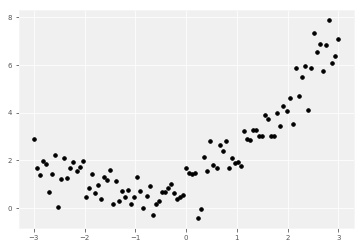

In [ ]:
data = np.loadtxt("../data/sintetični/data_B.txt")
x    = data[:, [0]]
y    = data[:, [1]]

plt.figure()
plt.plot(x, y, "k.")
plt.show()

Already at first glance it is clear that the line model will not be enough. If we pull the line through the data, we see that in some places, the data is erroneous. This is also seen on the residual graph, since the error obviously depends on the size of $y$, which we do not want.

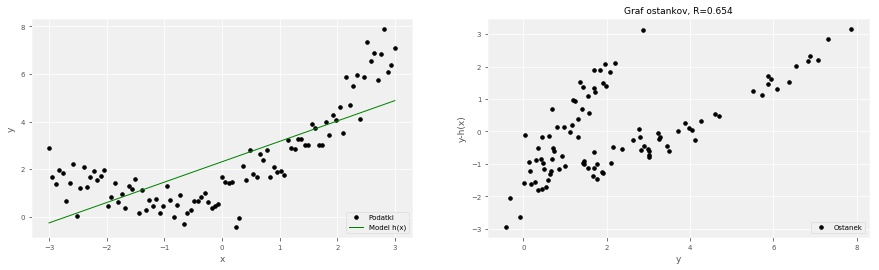

In [9]:
model = LinearRegression()
model.fit(x, y)
hx = model.predict(x)

plot_fit_residual(x, y, hx)

In [10]:
explained_var = 100.0 * ( np.var(y) - np.var(hx-y) ) /  np.var(y)
print("Explained variance: %.2f " % explained_var + "%" )

Explained variance: 57.23 %


## Polynomial regression model

Linear models can also model non-linear dependencies, which is somewhat surprising given the initial assumptions. The $x$ value in this case is a one-dimensional variable (p=1).

**Polynomial regression model** in one dimension is a polynomial of degree $D$:

$$ h(\vec{x}) = \beta_1 x + \beta_2 x^2 + ... + \beta_D x^D + \beta_0$$

The effect is achieved by appropriately arranging the space. The variable $x$ is mapped into a vector by calculating the corresponding potencies:

$$x \rightarrow (x, x^2, x^3, ... x^D) = \vec{x}$$

In such an assembly, there is nothing more than a linear mapping!

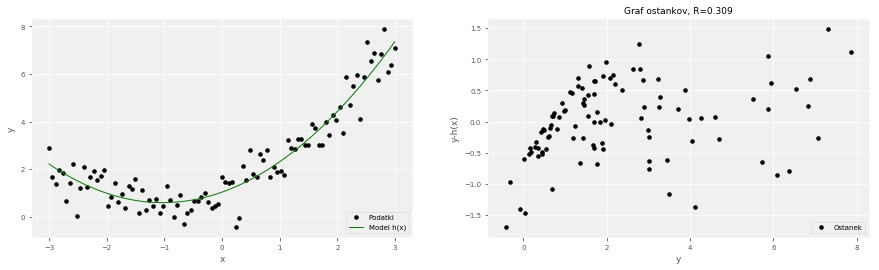

In [11]:
# Iz 1-D sestavimo nov 2-D prostor
X = np.zeros((len(x), 2))
X[:, 0] = x.ravel()
X[:, 1] = x.ravel()**2       

# Učenje
model = LinearRegression()
model.fit(X, y)

# Napoved
hx = model.predict(X)

plot_fit_residual(x, y, hx)

##### Question 6-1-1
Compare the explained variance of the linear and polynomial model.

In [12]:
# ...

[Answer](206-1.ipynb#Answer-6-1-1)

<img src="../slike/linreg_4.png" width=600/>

## Overfitting

Of course, we often do not know the optimal model. The use of excessively complex models (complexity can be represented as the size of a family of functions) can lead to **overfitting**.

Let's look at the example of a 20 degree polynomial:

In [13]:
def plot_coefficients(coef):
    coef=coef.ravel()
    D = len(coef)
    plt.title("Parametri modela")
    plt.bar(np.arange(D), coef)
    plt.xticks(np.arange(D))
    plt.grid()
    plt.ylabel("beta")
    plt.xlabel("d")
    plt.show()

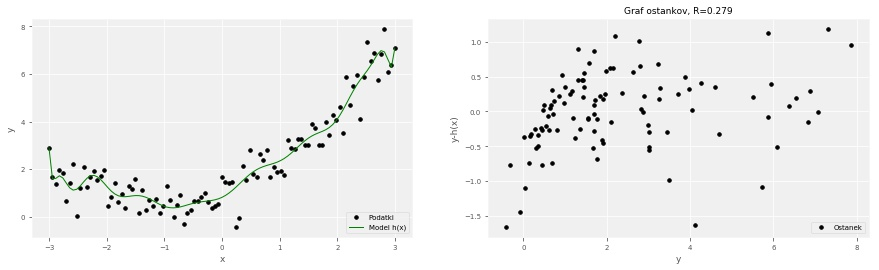

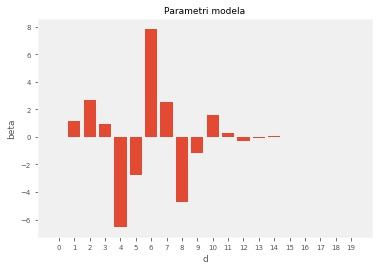

In [14]:
D = 20 # stopnja polinoma
X = np.zeros((len(x), D))
for d in range(0, D):
    X[:, d] = x.ravel()**d
    
model = LinearRegression()
model.fit(X, y)

hx = model.predict(X)

plot_fit_residual(X[:, 1], y, hx)
plot_coefficients(model.coef_)

The model seems to fit the data perfectly. The graph of the remains also shows a stimulating picture. The problem of over-fitting occurs when **predicting new data**.

##### Question 6-1-2
Measure the explained variance of the polynomial model.

In [15]:
# ...

[Answer](206-1.ipynb#Answer-6-1-2)

## Solution: punishing excessively complex models

In addition to minimizing the mean square error, we can also penalize the *complexity of the models* when looking for a solution. Therefore, we want the parameters found in the geometric sense to be as small as possible. This procedure is also known as regularization. The degree of regularization is monitored by the parameter $\alpha$, which is defined by the users. The two most common models are:
* Regression Lasso

*"Punishment of the Manhattan distance of the vector $\vec{\beta}$ from the baseline"*

$$ \text{min}_{\beta} \sum_1^{n} (y_i - h(\vec{x}_i))^2 + \alpha \|\vec{\beta}\|_1 $$

<font color="green">Pro</font>: returns **sparse** parameter vectors $\vec{\beta}$. Most of the components $\beta_j$ will be 0 - <font color="green">VERY DESIRABLE</font>!

<font color="red">Con</font>: complex planning of optimization algorithms


* Regression Ridge
*"Penalizing the eclidic distance of the vector $\vec{\beta}$ from the starting point"*
$$ \text{min}_{\beta} \sum_1^{n} (y_i - h(\vec{x}_i))^2  + \alpha \|\vec{\beta}\|_2 $$

<font color="green">Pro</font>: Easy calculation

<font color="red">Con</font>: Generally does not return rare parameter values.

/Users/tomazc/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


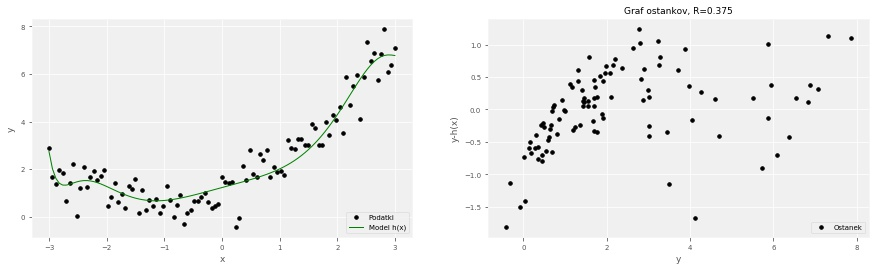

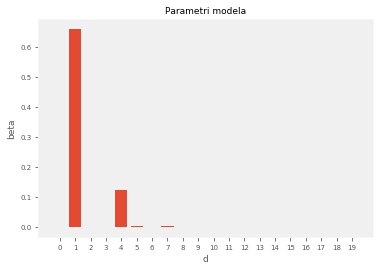

array([  0.00000000e+00,   6.58850431e-01,   0.00000000e+00,
         0.00000000e+00,   1.22399188e-01,   1.87262986e-03,
        -1.16281589e-03,   8.50950453e-04,  -1.20612955e-03,
         5.23047145e-05,  -3.03969640e-05,  -7.80830399e-07,
        -6.91820876e-08,  -5.82661667e-07,   1.66059558e-07,
        -7.52018735e-08,   3.29435443e-08,  -6.33885211e-09,
         5.15017709e-09,  -2.93131818e-10])

In [16]:
D = 20 # stopnja polinoma

# Ustvarimo ustrezen prostor
X = np.zeros((len(x), D))
for d in range(0, D):
    X[:, d] = x.ravel()**d
    
model = Lasso(alpha=0.1)
model.fit(X, y)

hx = model.predict(X)

plot_fit_residual(X[:, 1], y, hx)
plot_coefficients(model.coef_)
model.coef_

##### Question 6-1-3
What is the effect of the parameter ```alpha``` on a) the fitting quality, b) model coefficients? Try to model the data using regression ```Ridge```.

In [17]:
# ... 

[Answer](206-1.ipynb#Answer-6-1-3)

The function looks like "just the right" model fpr the data. On the graph of the coefficients (parameters) we see that the coefficients of lower levels of the polynomial are most of the weight, which is a less complex model.

##### Question 6-1-4
Find polynomial regression models for the following three sets of data. Choose the degree of the polynom and perhaps the type of the regularization model. Draw graph function and residue diagram. Comment the results.

Correct solutions (you find the coefficients and degree of polynomials in ```../data/sintetični/coefficients_*.txt```

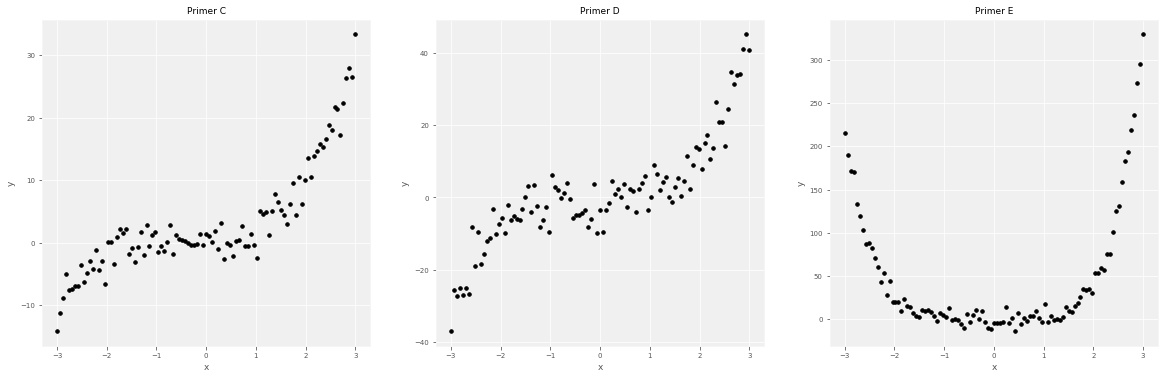

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

for example, ax in zip(["C", "D", "E"], axes):
    data = np.loadtxt("../data/sintetični/data_%s.txt" % example)
    x    = data[:, [0]]
    y    = data[:, [1]]
    
    ax.plot(x, y, "k.")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title("Primer %s" % example)
    
    # ... 

[Answer](205-1.ipynb#Answer-5-1-4)

<img src="../slike/linreg_5.png" width=400/>

## Use in practice: sentiment analysis

Finally, let's look at a completely practical example of using regression models. There are 1101 book reviews in the database. Each review consists of text (string of characters, words) and ratings between 1 and 5 (1-terrible, 5-excellent).
The original database and article are available <a href="https://www.cs.jhu.edu/~mdredze/datasets/sentiment/">here</a>.

An example of a <font color="green">positive</font> review of one of the books (rating = 5).

```
I'm a little late in reading this book.  I am trying to pace myself between the movies and the books so that I can enjoy a little Harry Potter at least every year.  
  I think Goblet of Fire is the best in the series, so naturally it would be pretty difficult for Phoenix to live up to that standard.  In Goblet, it feels like Rowling had a fantastic ending in mind, and that drove the writing of the story.  In Phoenix, it seems like the story is key and the ending was simply tacked on to round it out and provide some concluding information.  The major theme seemed to be the Ministry's takeover of Hogwarts.  I found that entire thread to be thoroughly engrossing.  Harry's dreams, however, took on sub-plot status, and then rose to the top for the final conflict.  
  I didn't mind the length of the book, but it did seem to drag in a couple of places.  The gang spent too much time at Grimmauld Place.  I could have also done without Hagrid's giant story.  
  My biggest problem with the book was Dumbledore's secrecy.  Good stories have real roadblocks to keep the hero from achieving his/her goal.  In Phoenix, the cause for most of the confusion was that Dumbledore was reluctant to share certain information with Harry.  He explains his behavior in a most unconvincing way in the final pages.  The secrecy was necessary for the story to take the course that it did, but it lacked good motivation and left me feeling let down.  It reminded me of the natural disaster movie template where the world could be easily saved if not for an arrogant bureaucrat who refuses to listen to the young upstart with all the answers.  It is contrived conflict that is hardly believable.
  Don't get me wrong.  I love the Harry Potter series.  And, perhaps my expectations have risen too high.  I am eagerly awaiting the movie and then I know I will devour book 6 (when I allow myself to read it).  I lose interest in most book series after the first couple of installments.  Harry Potter always leaves me wanting more. 
```

An example of a <font color="red">negative</font> review of one of the books (rating = 2).

```
This book was horrible.  If it was possible to rate it lower than one star i would have.  I am an avid reader and picked this book up after my mom had gotten it from a friend.  I read half of it, suffering from a headache the entire time, and then got to the part about the relationship the 13 year old boy had with a 33 year old man and i lit this book on fire.  One less copy in the world...don't waste your money.

I wish i had the time spent reading this book back so i could use it for better purposes.  This book wasted my life.
```

We present each review in the space of the 4000 most common words or word pairs in the database (bag-of-words presentation). Each component of the line $x$ (vector) counts how many time a word/pair of words appears in a given review.

In [ ]:
from pickle import load
from os.path import join

def load_data(dset):
    data = dict()

    indir = "../data/%s/" % dset

    for name in "data", "target", "data_test", "target_test":
        fname = join(indir, name + ".pkl")
        data[name] = load(open(fname, "rb"))

        fname = join(indir, "features.txt")
        fp = open(fname, "rt")
        data["features"] = list(map(lambda l: l.strip(), fp.readlines()))

    return data

books = load_data("books")
X = books["data"]
y = books["target"]


print(str(books['features'][:3]) + '...' + str(books['features'][-3:]))
print(X.todense())
print(y)
print(X.shape, y.shape)

['the', 'a', 'and']...['colors', 'and_most', 'introduced']
[[ 3  4  0 ...,  0  0  0]
 [ 1  1  1 ...,  0  0  0]
 [ 0  0  2 ...,  0  0  0]
 ..., 
 [ 4  2  1 ...,  0  0  0]
 [10  2  5 ...,  0  0  0]
 [ 7  3  3 ...,  0  0  0]]
[1 2 2 ..., 4 5 2]
(1101, 4000) (1101,)


The order of columns in the matrix $X$:

In [20]:
features = books["features"]
features

['the',
 'a',
 'and',
 'to',
 'of',
 'this',
 'book',
 'is',
 'in',
 'i',
 'it',
 'for',
 'that',
 'this_book',
 'with',
 'but',
 'on',
 'not',
 'are',
 'have',
 'as',
 'of_the',
 'was',
 'be',
 'you',
 'in_the',
 'an',
 'all',
 'read',
 'from',
 'if',
 'about',
 'one',
 'or',
 'by',
 'at',
 'is_a',
 'more',
 'the_book',
 'what',
 'very',
 'my',
 'who',
 'so',
 'has',
 'like',
 'some',
 'good',
 'would',
 'his',
 'there',
 '<num>',
 'to_the',
 'how',
 'they',
 'he',
 'it_is',
 'out',
 'just',
 'other',
 'book_is',
 'will',
 'much',
 'can',
 'great',
 'this_is',
 'do',
 'no',
 'your',
 'when',
 'up',
 'only',
 'which',
 'and_the',
 'than',
 'on_the',
 'to_be',
 'even',
 'many',
 'had',
 'me',
 'get',
 'time',
 'also',
 'well',
 'their',
 "it's",
 'into',
 'for_the',
 'if_you',
 'them',
 'really',
 'first',
 'were',
 'books',
 'most',
 'reading',
 'then',
 'any',
 "don't",
 'been',
 'with_the',
 'author',
 'as_a',
 'because',
 'way',
 'know',
 'in_a',
 'could',
 'these',
 'people',
 'in_

A database of test cases is also included, where we can test the predictive accuracy of the model on new data.

In [21]:
X_test = books["data_test"]
y_test = books["target_test"]

##### Question 6-1-5
Use the aforementioned linear models for modeling data in the problem of the sentiment analysis. Measure the mean square error and the explained variance on test cases.

In [22]:
# ...

[Answer](206-1.ipynb#Answer-6-1-5)

##### Question 6-1-6
Can you find out which phrases have a strong positive and strong negative impact on the final rating of the review? Tip: use the value of the coefficients for each column.

In [23]:
# ...

[Answer](206-1.ipynb#Answer-6-1-6)